Task 1 (20 points) For the Titanic challenge (https://www.kaggle.com/c/titanic), we need to
guess whether the individuals from the test dataset had survived or not. 

1) Preprocess your Titanic training data;

In [8]:
import pandas as pd

# Load the dataset
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Fill missing values
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())


# Fill missing values without inplace
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())

# Convert 'Sex' to numeric
train_data['Sex'] = train_data['Sex'].map({'male': 1, 'female': 0})
test_data['Sex'] = test_data['Sex'].map({'male': 1, 'female': 0})

# One-hot encode 'Embarked'
train_data = pd.get_dummies(train_data, columns=['Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Embarked'], drop_first=True)

# Feature engineering: FamilySize and Title
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

train_data['Title'] = train_data['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
test_data['Title'] = test_data['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

# Group rare titles
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
train_data['Title'] = train_data['Title'].replace(rare_titles, 'Rare')
test_data['Title'] = test_data['Title'].replace(rare_titles, 'Rare')

# Map common titles
title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}
train_data['Title'] = train_data['Title'].map(title_mapping)
test_data['Title'] = test_data['Title'].map(title_mapping)

# Drop unnecessary columns
train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Define feature set and target variable
X_train = train_data.drop('Survived', axis=1)
y_train = train_data['Survived']
X_test = test_data.copy()

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the training data for validation
X_train_part, X_valid, y_train_part, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train_part, y_train_part)

# Validate the model
y_pred = model.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
print(f"Validation Accuracy: {accuracy}")

# Predict on the test set
test_predictions = model.predict(X_test)

# Prepare submission file
submission = pd.DataFrame({
    "PassengerId": pd.read_csv('test.csv')["PassengerId"],
    "Survived": test_predictions
})

# Save to CSV
submission.to_csv('submission.csv', index=False)
print("Submission file created as 'submission.csv'.")

Validation Accuracy: 0.8268156424581006
Submission file created as 'submission.csv'.


In [14]:
# Count the number of survivors and non-survivors in the training data
survival_counts = train_data['Survived'].value_counts()

# Print the output
print("Number of individuals who survived:", survival_counts[1])
print("Number of individuals who did not survive:", survival_counts[0])

Number of individuals who survived: 342
Number of individuals who did not survive: 549


2) (5 points ) Learn and fine-tune a decision tree model with the Titanic training data, plot
your decision tree;

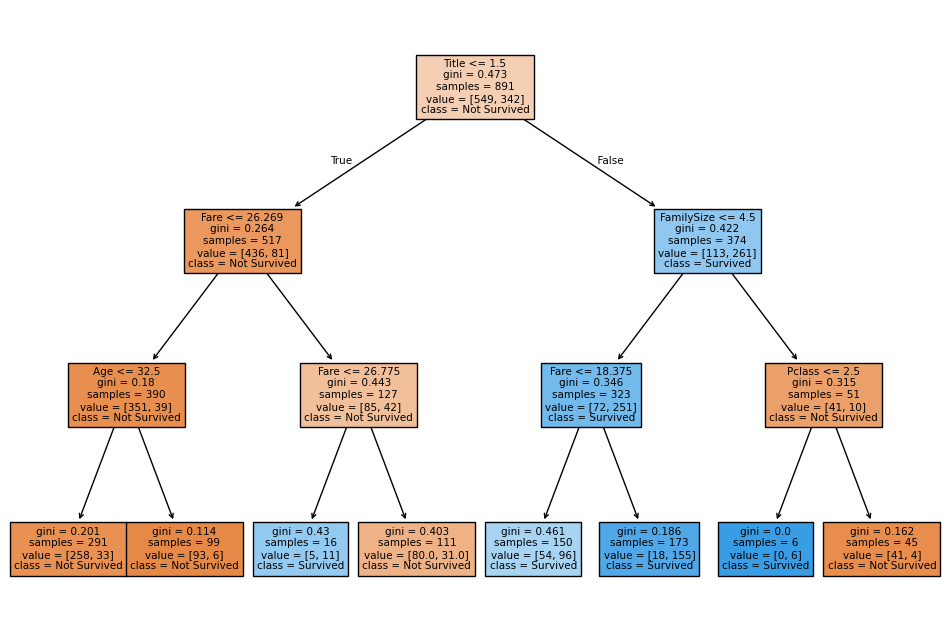

In [9]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=3)  # Example hyperparameter
dt_model.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(12,8))
plot_tree(dt_model, filled=True, feature_names=X_train.columns, class_names=['Not Survived', 'Survived'])
plt.show()


3) (5 points) Apply the five-fold cross validation of your fine-tuned decision tree learning
model to the Titanic training data to extract average classification accuracy;

In [10]:
from sklearn.model_selection import cross_val_score

# Apply 5-fold cross-validation on the Decision Tree model
dt_cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')
dt_avg_accuracy = dt_cv_scores.mean()
print(f'Average accuracy for Decision Tree: {dt_avg_accuracy:.4f}')

Average accuracy for Decision Tree: 0.8226


4) (5 points) Apply the five-fold cross validation of your fine-tuned random forest learning
model to the Titanic training data to extract average classification accuracy;

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Train and cross-validate the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5)  # Example hyperparameters
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
rf_avg_accuracy = rf_cv_scores.mean()
print(f'Average accuracy for Random Forest: {rf_avg_accuracy:.4f}')

Average accuracy for Random Forest: 0.8271


5) (5 points) Which algorithm is better, Decision Tree or Random Forest? What are your
observations and conclusions from the algorithm comparison and analysis?

Decision Tree: It is simple and easier to implement but may suffer overfitting.
Random Forest: On aggregating multiple Decision trees. They tend to be more robust and offer better accuracy, especially on unseen data.

In my observations based on the above code and accuracy Random Forest Performs better than single Decision Tree.